# 2 First prediction

In [2]:
import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
pred=    [1,1,1,1,1,0,0,0,0,0]
reality= [1,0,1,1,1,1,0,0,0,0]

In [3]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'Attrition_num'],
      dtype='object')

## 2.1 prediction evaluation

<img src="assets/confusion_matrix.png" width="500" height="500">
<img src="assets/accuracy.png" width="500" height="500">
<img src="assets/precision.png" width="500" height="500">
<img src="assets/recall.png" width="500" height="500">
<img src="assets/f1_score.png" width="500" height="500">

# 2.1 First prediction

In [4]:
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]
y = df['Attrition_num']

In [5]:
y.value_counts()

0    3677
1     705
Name: Attrition_num, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
y_test.value_counts()

0    755
1    122
Name: Attrition_num, dtype: int64

In [8]:
y_train.value_counts()

0    2922
1     583
Name: Attrition_num, dtype: int64

In [9]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

In [11]:
print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.9247434435575826
0.8428997937248941
0.8428997937248941


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



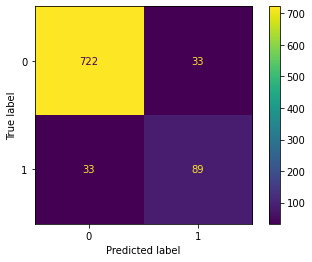

In [12]:
plot_confusion_matrix(neigh, X_test, y_test)